# Simple Edge Detection With OpenCV

In this tutorial we'll find edges using the Sobel operator (`cv2.Sobel()`) and Canny edge detector (`cv2.Canny()`) from OpenCV.

This tutorial was adapted from [here](https://github.com/dalgu90/opencv-tutorial).



## Load packages

In [1]:
import numpy as np
import cv2 
%matplotlib inline
import matplotlib.pyplot as plt

## Load sample image

dtype: uint8
shape: (342, 548)


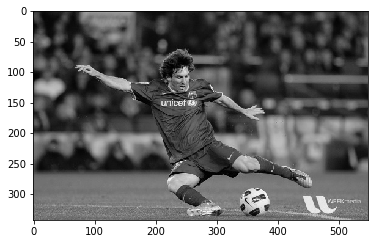

In [2]:
# Load an image into grayscale
input_image = cv2.imread('images/messi.jpg', cv2.IMREAD_GRAYSCALE)
print('dtype: ' + str(input_image.dtype))
print('shape: ' + str(input_image.shape))

plt.imshow(input_image, cmap='gray')

## 1. Edge detection with the Sobel operator
`edges = cv2.Sobel(src, ddepth, dx, dy, ksize=3, scale=1.0)`

* `src`: input image
* `ddepth`: output image depth
* `dx`: order of the derivative x
* `dy`: order of the derivative y
* `ksize`: size of the extended Sobel kernel; it must be 1, 3, 5, or 7
* `scale`: optional scale factor for the computed derivative values

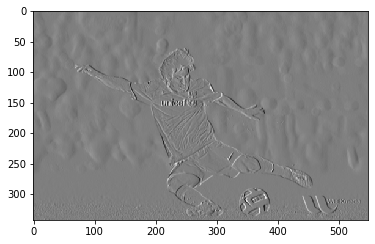

In [3]:
ddepth = cv2.CV_64F  # 64-bit float output
dx = 1  # First-order derivative in x-direction
dy = 0  # No derivative in y-direction
sobelx = cv2.Sobel(input_image, ddepth, dx, dy)

plt.imshow(sobelx, cmap='gray')

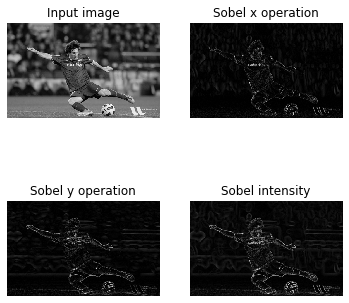

In [4]:
# Sobel operations and their magnitudes
sobelx = cv2.Sobel(input_image, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(input_image, cv2.CV_64F, 0, 1)
sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))

plt.figure(figsize=(6, 6));
plt.subplot(2, 2, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(input_image, cmap='gray');
plt.subplot(2, 2, 2); plt.title('Sobel x operation'); plt.axis('off');
plt.imshow(cv2.absdiff(sobelx, 0.0), cmap='gray')
plt.subplot(2, 2, 3); plt.title('Sobel y operation'); plt.axis('off');
plt.imshow(cv2.absdiff(sobely, 0.0), cmap='gray');
plt.subplot(2, 2, 4); plt.title('Sobel intensity'); plt.axis('off');
plt.imshow(sobel, cmap='gray');

## 2. Canny Edge Detection
`edges = cv2.Canny(image, threshold1, threshold2, apatureSize=3, L2gradient=False)`

* `image`: 8-bit grayscale input image
* `threshold1/threshold2`: thresholds for the hysteresis procedure
* `apertureSize`: aperture size for the Sobel() operator
* `L2gradient`: A flag. `True` to use L2-norm of gradients. `False` for L1-norm

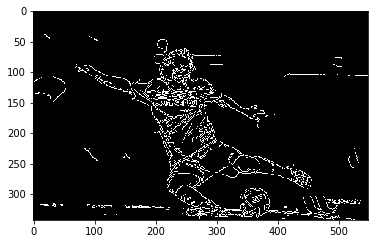

In [5]:
threshold1 = 100
threshold2 = 200
canny = cv2.Canny(input_image, threshold1, threshold2)

plt.imshow(canny, cmap='gray')

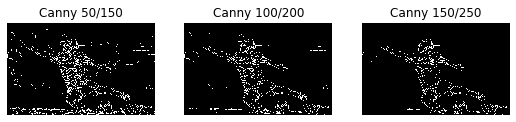

In [6]:
# Edge detections with various thresholds
canny1 = cv2.Canny(input_image, 50, 150)
canny2 = cv2.Canny(input_image, 100, 200)
canny3 = cv2.Canny(input_image, 150, 250)

plt.figure(figsize=(9, 3));
plt.subplot(1, 3, 1); plt.title('Canny 50/150'); plt.axis('off');
plt.imshow(canny1, cmap='gray');
plt.subplot(1, 3, 2); plt.title('Canny 100/200'); plt.axis('off');
plt.imshow(canny2, cmap='gray');
plt.subplot(1, 3, 3); plt.title('Canny 150/250'); plt.axis('off');
plt.imshow(canny3, cmap='gray');

Here's another exmaple:

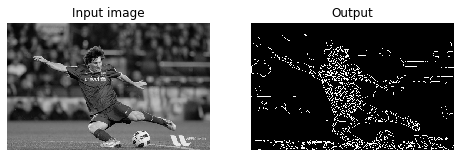

In [7]:
# Load image
impath = 'images/messi.jpg'
image = cv2.imread(impath, cv2.IMREAD_GRAYSCALE)

# Find edges
threshold1 = 50
threshold2 = 150
output = cv2.Canny(image, threshold1, threshold2)

# Display predictions
plt.figure(figsize=(8, 3));
plt.subplot(1, 2, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB));
plt.subplot(1, 2, 2); plt.title('Output'); plt.axis('off');
plt.imshow(output, cmap='gray')